In [1]:
import os
import sys
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
n_runs = 3 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 


In [3]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [4]:
my_start = 400.0
my_stop = 1.6e4
my_step = 800.0

my_variables = list(np.arange(my_start, my_stop, my_step))
my_variables.insert(0, 0.0)
print(my_variables)

[0.0, 400.0, 1200.0, 2000.0, 2800.0, 3600.0, 4400.0, 5200.0, 6000.0, 6800.0, 7600.0, 8400.0, 9200.0, 10000.0, 10800.0, 11600.0, 12400.0, 13200.0, 14000.0, 14800.0, 15600.0]


In [7]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
#study_name ='sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayy' 
study_name = 'sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_Nowakefields_QpxQpy5e-1_ayy'
noise_type = 'PN'

In [8]:
ex_dict = {} # type: dictionary
ey_dict = {}


for var in my_variables:
    for run in range(n_runs):
        temp_name = f'{var}_run{run}' # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}{var}_run{run}/file.txt', delimiter = ",", unpack = True)
        # B. Create a different list for each run and save the emittance values
        ex_dict[temp_name] = emitX 
        ey_dict[temp_name] = emitY

OSError: /afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_Nowakefields_QpxQpy5e-1_ayy0.0_run0/file.txt not found.

### Do the polynomial fit, deg=1

In [19]:
m_dict = {} # slope of the fit
b_dict = {} # offset
err_dict = {} # error of the gradient of the fit slope
for var in my_variables:
    m_dict[f'{var}'], b_dict[f'{var}'], err_dict[f'{var}'] = [], [], []
    for run in range(n_runs):
        temp_name = f'{var}_run{run}'
        # linear fit
        [m, b], cov = np.polyfit(tspan, ey_dict[temp_name], 1, cov=True)
        # compute the error of the gradient of the fit slope
        err= np.sqrt(np.diag(cov))
        m_dict[f'{var}'].append(m) # len(m_dict[f'{var}']) = n_runs
        b_dict[f'{var}'].append(b)
        err_dict[f'{var}'].append(err[0])

In [20]:
data = {}
for var in my_variables:
    data[f'ayy_{var}'] =[m_dict[f'{var}'], b_dict[f'{var}'], err_dict[f'{var}']]
df = pd.DataFrame(data, index=['m','b','err'])

filename = f'deyRates_{study_name}Scan_v2.pkl'
if not os.path.exists(filename):
    df.to_pickle(filename)

In [21]:
df

,ayy_9600.0,ayy_10400.0,ayy_11200.0,ayy_12000.0,ayy_12800.0,ayy_13600.0,ayy_14400.0,ayy_15200.0
m,"[2.638838444539281e-08, 2.078739968946508e-08,...","[2.3876177198483267e-08, 2.2393745329115065e-0...","[2.5698257011727584e-08, 2.2996757192198644e-0...","[2.1183777509186373e-08, 2.7349146995089988e-0...","[2.602258654107215e-08, 2.2276036574573737e-08...","[2.4168532967651007e-08, 2.6830130590641406e-0...","[2.2812335477107567e-08, 1.9505378439906653e-0...","[2.456724114420892e-08, 2.0680248479553685e-08..."
b,"[2.0011975839544234e-06, 2.0008781250122243e-0...","[1.9947169466425986e-06, 2.0046466501013207e-0...","[2.0018113438824218e-06, 1.9972881693832753e-0...","[1.9969990188215484e-06, 2.002729968464801e-06...","[2.0008967195938428e-06, 2.000413980151015e-06...","[1.9979332903394546e-06, 1.9958712309677773e-0...","[1.995915823635964e-06, 2.0044754321791757e-06...","[2.000397907977805e-06, 2.0036962808400293e-06..."
err,"[8.417155208117679e-11, 4.7520088503828564e-11...","[5.513353740023748e-11, 3.505312766148465e-11,...","[6.381135392967278e-11, 3.146609481232457e-11,...","[2.972171260946486e-11, 9.086962905763876e-11,...","[6.495127261446017e-11, 4.0904212961958046e-11...","[1.2028597481276425e-10, 5.5292701260538964e-1...","[4.2207262483396716e-11, 2.836712442220588e-11...","[5.1361260256570935e-11, 5.356758297045163e-11..."


### Plot emittance growth for one of the variables

['ayy_9600.0', 'ayy_10400.0', 'ayy_11200.0', 'ayy_12000.0', 'ayy_12800.0', 'ayy_13600.0', 'ayy_14400.0', 'ayy_15200.0']
ayy_14400.0


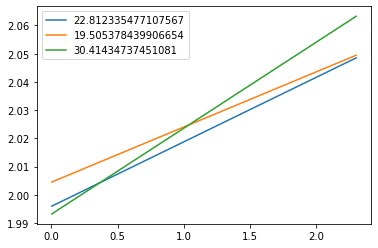

In [32]:
studies_list = list(df.keys())
print(studies_list)
study = studies_list[6] # choose study
print(study)

for run in np.arange(len(df[study]['m'])):
    #plt.plot(tspan, np.array(ey_dict[f'14400.0_run{run}'])/np.array(ey_dict[f'14400.0_run{run}'][0]) )
    plt.plot(tspan, (df[study]['m'][run]*tspan+df[study]['b'][run])*1e6, label=df[study]['m'][run]*1e9)
# linear fit on the emittance values obtained from the simulation averaged over turns
#plt.plot(time, (m*time+b)*1e6, c = 'k', label='dey/dt={0:.2f}'.format(m*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err[0]*1e9), linewidth = 2)
plt.legend()

#plt.plot(time, df[])